In [10]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loans_data_cleaned.csv')

In [3]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,empl_exp
0,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,RENT,40000.0,...,1359.78,0.0,0.0,Sep-2015,119.17,Jan-2016,15386.0,13605.0,8100.0,experienced
1,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,B4,RENT,25000.0,...,181.53,0.0,0.0,Jul-2014,2677.23,Jan-2016,154.0,19530.0,5300.0,experienced
2,28000.0,28000.0,28000.0,36 months,7.62,872.52,A,A3,MORTGAGE,325000.0,...,1150.98,0.0,0.0,Aug-2014,23915.86,Aug-2014,0.0,799592.0,54200.0,intermed
3,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,B5,MORTGAGE,100000.0,...,4652.21,0.0,0.0,Dec-2015,10726.61,Dec-2015,539.0,199834.0,28200.0,experienced
4,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,B2,MORTGAGE,33000.0,...,1120.22,15.0,0.0,Oct-2015,276.88,Jan-2016,0.0,15949.0,20800.0,new


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209541 entries, 0 to 209540
Data columns (total 38 columns):
loan_amnt              209541 non-null float64
funded_amnt            209541 non-null float64
funded_amnt_inv        209541 non-null float64
term                   209541 non-null object
int_rate               209541 non-null float64
installment            209541 non-null float64
grade                  209541 non-null object
sub_grade              209541 non-null object
home_ownership         209541 non-null object
annual_inc             209541 non-null float64
verification_status    209541 non-null object
issue_d                209541 non-null object
purpose                209541 non-null object
dti                    209541 non-null float64
delinq_2yrs            209541 non-null float64
earliest_cr_line       209541 non-null object
inq_last_6mths         209541 non-null float64
open_acc               209541 non-null float64
pub_rec                209541 non-null float64
revo

In [41]:
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
purpose                0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
recoveries             0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
tot_coll_amt           0
tot_cur_bal            0
total_rev_hi_lim       0
empl_exp               0
dtype: int64

The goal of this exercise is to see whether we can predict someone will not pay off their loan or have become very delinquent on theirpayment. In this dataset it is in the 'loan_status' column. 

In [6]:
df.loan_status.unique()

array(['Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'In Grace Period', 'Default', 'Issued'], dtype=object)

The term **'Charged Off'** is the declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors will make this declaration at the point of six months without payment. Tus we wil be using this as our Class 1 or the positive case.

In [8]:
#set 'Charged Off' to 1 and the rest to 0

mask = (df.loan_status == 'Charged Off')
df['target'] = 0
df.loc[mask,'target'] = 1
target = df['target'] # here we have defined the target or the y - values 

In [15]:
#The features f the 'X-values' will be all columns minus the 'taget and loan_status' columns
df = df.drop(['loan_status','target'],axis=1)

In [16]:
print('Shape of features = {}, and of y-values = {}'.format(np.shape(df), np.shape(target)))

Shape of features = (209541, 38), and of y-values = (209541,)


Before we couls start the ML part we need to take care of the categorical features.

In [17]:
# next step let's seperate the categorical from number columns
loan_categorical = df.select_dtypes(include=['object'], exclude=['float64','int64'])
features = df.select_dtypes(include=['float64','int64'])

In [18]:
print('Numerical features: \n{}'.format(list(features)))
print('Categorical features: \n{}'.format(list(loan_categorical)))

Numerical features: 
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
Categorical features: 
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'empl_exp']


One of the true power of ML and sklearn is the ability to use categorical data  to train the model. But to do we need to convert to numerical data

In [19]:
for col in list(loan_categorical):
    dummy = pd.get_dummies(loan_categorical[col])
    features = pd.concat([features,dummy],axis=1)

In [21]:
print('Shape of features = {}, and of y-values = {}'.format(np.shape(features), np.shape(target)))

Shape of features = (209541, 865), and of y-values = (209541,)


In [23]:
features.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,Sep-2012,Sep-2013,Sep-2014,Sep-2015,experienced,inexp,intermed,new,seasoned,unknown
0,12000.0,12000.0,12000.0,13.53,407.40,40000.0,16.94,0.0,0.0,7.0,...,0,0,0,0,1,0,0,0,0,0
1,3000.0,3000.0,3000.0,12.85,100.87,25000.0,24.68,0.0,0.0,5.0,...,0,0,0,0,1,0,0,0,0,0
2,28000.0,28000.0,28000.0,7.62,872.52,325000.0,18.55,0.0,1.0,15.0,...,0,0,0,0,0,0,1,0,0,0
3,24000.0,24000.0,24000.0,13.53,814.80,100000.0,22.18,0.0,0.0,14.0,...,0,0,0,0,1,0,0,0,0,0
4,8000.0,8000.0,8000.0,10.99,261.88,33000.0,15.75,0.0,1.0,9.0,...,0,0,0,0,0,0,0,1,0,0


We need to apply train test split on the data before we can apply ML. Why Train-test split our data? 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)

In [36]:
print('Shape of X_train = {}, and of y_train = {}'.format(np.shape(X_train), np.shape(y_train)))

Shape of X_train = (157155, 865), and of y_train = (157155,)


In [37]:
print('Shape of X_test = {}, and of y_test = {}'.format(np.shape(X_test), np.shape(y_test)))

Shape of X_test = (52386, 865), and of y_test = (52386,)


Now we can train a couple of models to determine if someone is "Charged Off" on their loan. We will explore the following models:
1. K nearest-Neighbours (KNN)
2. Linear Support Vector Machines (SVM)
3. Random Forests
4. Gradient Boosted Decision Trees
5. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
y_pred_LR = model.predict(X_test)

In [32]:
print('Accuracy of the model = {:.4f}'.format(model.score(X_test,y_test)))

Accuracy of the model = 0.9987


In [28]:
# Some metrics to test the model relaibility
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print('confusion matrix:\n {}'.format(confusion_matrix(y_test,y_pred_LR)))

confusion matrix:
 [[43777     1]
 [   67  8541]]


In [38]:
print('Classification report: \n {}'.format(classification_report(y_test,y_pred_LR)))

Classification report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     43778
          1       1.00      0.99      1.00      8608

avg / total       1.00      1.00      1.00     52386



In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [49]:
precision, recall, thresholds = precision_recall_curve(y_test,model.predict_proba(X_test)[:, 1])
AUC = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

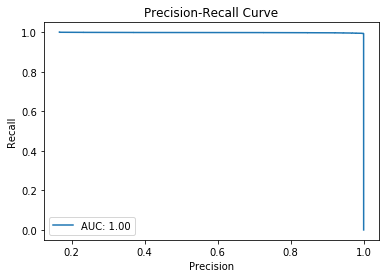

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(precision, recall, label='AUC: {:.2f}'.format(AUC))
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.savefig('Jacs_PR_curve.png')